In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Objeto 'Area_plot'

In [3]:
class Area_plot:
    def __init__(self, axes, x, y):
        self.ax = axes
        self.x = x
        self.y = y
        
        
    def set_axes(self,**kwargs):
        self.diccionario = kwargs
        
        self.ax.set_xlabel(self.diccionario['xlabel'])
        self.ax.set_ylabel(self.diccionario['ylabel'])
        self.ax.set_xlim(self.diccionario['xlim'])
        self.ax.set_ylim(self.diccionario['ylim'])
        self.ax.grid('grid')
        self.ax.set_xticks(self.diccionario['ticks']['xtick_major'])
        self.ax.set_yticks(self.diccionario['ticks']['ytick_major'])
        self.ax.set_xticks(self.diccionario['ticks']['xtick_minor'], minor = True)
        self.ax.set_yticks(self.diccionario['ticks']['ytick_minor'], minor = True)

        #ax[i].set_xticklabels(diccionario[i]['xticks_major_l'])
        #ax[i].set_yticklabels(diccionario[i]['yticks_major_l'])
        #ax[i].set_xticklabels(diccionario[i]['xticks_minor_l'], minor = True)
        #ax[i].set_yticklabels(diccionario[i]['yticks_minor_l'], minor = True)

        self.ax.spines['right'].set_visible(self.diccionario['spines']['right'])
        self.ax.spines['left'].set_visible(self.diccionario['spines']['left'])
        self.ax.spines['top'].set_visible(self.diccionario['spines']['top'])
        self.ax.spines['bottom'].set_visible(self.diccionario['spines']['bottom'])
        
    def dibujar(self):
        self.ax.stackplot(self.x, self.y)
        

## Objeto 'Figura'

In [7]:
class Figura:
    def __init__(self, n_x_m, alto_x_ancho = [3,3], titulo = 'Título principal', diccionarios = None):
        self.n = n_x_m[0]
        self.m = n_x_m[1]
        h_pad = alto_x_ancho[0]
        w_pad = alto_x_ancho[1]

        fig = plt.figure(figsize = (10,6))
        fig.suptitle(titulo, y = 1.05)
        
        self.ax = fig.subplots(self.n, self.m)
        fig.tight_layout(h_pad = h_pad, w_pad = w_pad)
        
        
        if self.n == 1 and self.m == 1:
            self.matriz_obj = 0
        #elif self.n == 1 or self.m == 1:
        #    self.matriz_obj = np.zeros(max(self.n, self.m), dtype = "object")
        else:
            self.matriz_obj = np.zeros((self.n,self.m), dtype = "object")
            
            
    def plot_area(self, coord, obj_area, x, y, **kwargs):
        self.coord = coord
        if self.n == 1 and self.m == 1:
            self.matriz_obj = obj_area(self.ax, x, y)
        elif self.n == 1 or self.m == 1:
            self.ax.shape = (self.n, self.m)
            self.matriz_obj[self.coord] = obj_area(self.ax[self.coord], x, y)
        else:
            self.matriz_obj[self.coord] = obj_area(self.ax[self.coord], x, y)
        return self
    
    
    def show(self):
        for _,matriz in np.ndenumerate(self.matriz_obj):
            if matriz == 0:
                pass
            else:
                matriz.dibujar()
                
    def set_axes(self,coord, **kwargs):
        self.diccionario = kwargs
        
        self.ax[coord].set_xlabel(self.diccionario['xlabel'])
        self.ax[coord].set_ylabel(self.diccionario['ylabel'])
        self.ax[coord].set_xlim(self.diccionario['xlim'])
        self.ax[coord].set_ylim(self.diccionario['ylim'])
        self.ax[coord].grid('grid')
        self.ax[coord].set_xticks(self.diccionario['ticks']['xtick_major'])
        self.ax[coord].set_yticks(self.diccionario['ticks']['ytick_major'])
        self.ax[coord].set_xticks(self.diccionario['ticks']['xtick_minor'], minor = True)
        self.ax[coord].set_yticks(self.diccionario['ticks']['ytick_minor'], minor = True)

        #ax[i].set_xticklabels(diccionario[i]['xticks_major_l'])
        #ax[i].set_yticklabels(diccionario[i]['yticks_major_l'])
        #ax[i].set_xticklabels(diccionario[i]['xticks_minor_l'], minor = True)
        #ax[i].set_yticklabels(diccionario[i]['yticks_minor_l'], minor = True)

        self.ax[coord].spines['right'].set_visible(self.diccionario['spines']['right'])
        self.ax[coord].spines['left'].set_visible(self.diccionario['spines']['left'])
        self.ax[coord].spines['top'].set_visible(self.diccionario['spines']['top'])
        self.ax[coord].spines['bottom'].set_visible(self.diccionario['spines']['bottom'])
        

/home/oscar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/oscar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


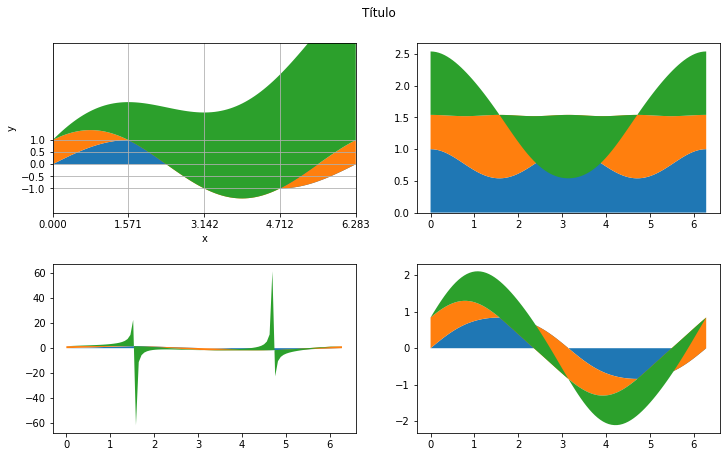

In [11]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x

#x = [1, 2, 3, 4, 5]
#y1 = [1, 1, 2, 3, 5]
#y2 = [0, 4, 2, 6, 8]
#y3 = [1, 3, 5, 7, 9]

y = np.vstack([y1, y2, y3])

a = Figura([2, 2], titulo = 'Título')
a.plot_area((0,0), Area_plot, x, y)
a.plot_area((1,1), Area_plot, x, np.sin(y))
a.plot_area((0,1), Area_plot, x, np.cos(y))
a.plot_area((1,0), Area_plot, x, np.tan(y))

ticks1 = {'xtick_major': np.linspace(0, 2*np.pi, 5), 'xtick_minor': np.linspace(0.5, 2.5, 0.5), 
          'ytick_major': np.linspace(-1, 1, 5), 'ytick_minor': np.linspace(0.5, 2.5, 0.5)}
spines1 = {'right': True, 'left': True, 'top': True, 'bottom': True}

car = {'xlabel': 'x', 'ylabel': 'y', 'xlim': (0, 2*np.pi), 'ylim': (-2, 5), 
       'grid': True, 'ticks': ticks1, 'spines': spines1} 

a.set_axes((0,0), **car)

a.show()